In [1]:
import pandas as pd
import numpy as np

benigntrojan = pd.read_csv("benign_trojan_18000_model_1_transformed.csv")
benigntrojan.head()

,Source,Destination,Protocol,Length,Type,Duration,Label
0,33952,443,1,60,0,0.000000,Benign
1,443,33952,1,60,1,0.000884,Benign
2,33952,443,1,52,0,0.001839,Benign
3,33952,443,3,452,0,0.001000,Benign
4,443,33952,1,52,1,0.000723,Benign


In [2]:
# Variabel independen
x = benigntrojan.drop(["Label"], axis = 1)
x.head()

# Variabel dependen
y = benigntrojan["Label"]
y.head()

0    Benign
1    Benign
2    Benign
3    Benign
4    Benign
Name: Label, dtype: object

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [4]:
from sklearn.naive_bayes import GaussianNB

# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()

# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(x_train, y_train)

In [5]:
# Menentukan hasil prediksi dari x_test

y_pred = nbtrain.predict(x_test)
y_pred

array(['Trojan', 'Trojan', 'Trojan', ..., 'Trojan', 'Trojan', 'Trojan'],
      dtype='<U6')

In [6]:
np.array(y_test)

array(['Benign', 'Trojan', 'Trojan', ..., 'Benign', 'Benign', 'Trojan'],
      dtype=object)

In [7]:
# Menentukan probabilitas hasil prediksi

nbtrain.predict_proba(x_test)

array([[0.0691829 , 0.9308171 ],
       [0.11617514, 0.88382486],
       [0.06940182, 0.93059818],
       ...,
       [0.15252365, 0.84747635],
       [0.06918288, 0.93081712],
       [0.11817131, 0.88182869]])

In [8]:
# Akurasi / Score

nbtrain.score(x_test,y_test, sample_weight=None)

0.4936111111111111

In [9]:
# membuat confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[  46, 1769],
       [  54, 1731]], dtype=int64)

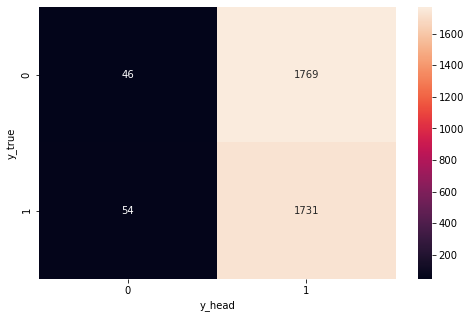

In [10]:
# Create Confusion Matrix

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) 

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [11]:
# Performance Matrix Report - Precision Recall f1score

from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Benign       0.46      0.03      0.05      1815
      Trojan       0.49      0.97      0.66      1785

    accuracy                           0.49      3600
   macro avg       0.48      0.50      0.35      3600
weighted avg       0.48      0.49      0.35      3600

